Welcome to horsetail matching. This tutorial shows you how to setup and run a very simple horsetail matching optimization. This assumes you have followed the installation tutorial. First we import the module...

In [1]:
from horsetailmatching import UncertainParameter, HorsetailMatching
from horsetailmatching.demoproblems import TP1

The first thing required for an optimization under uncertainty is a function to optimize. The horsetail matching python module comes with several test problems, which we will use here. We require a function that takes two arguments: the value of the design variables, and the value of the uncertainties. It should return the value quantity of interest.  

In [2]:
my_func = TP1
print TP1(x=[0, 1], u=[1, 0])

0.1


Now we must define the input uncertainties to the problem. These are created as horsetail matching parameters, which have the method getSample which allows the horsetail matching object to sample them accordingly. Here we create a uniformly distributed uncertainty and a gaussian uncertainty.

Then we create the HorsetailMatching object which will do the evalation of the horsetail matching metric. We can specify the target inverse CDF using the ftarget argument (by default a standard target of t(h) = 0 is used). 

In [3]:
u1 = UncertainParameter('uniform', lower_bound=-1, upper_bound=1)
u2 = UncertainParameter('gaussian', mean=0, standard_deviation=1)

def my_target(h): return 0

theHM = HorsetailMatching(my_func, [u1, u2], ftarget=my_target)

Now we use the evalMetric method to evaluate the horsetail matching metric at a design point:

In [17]:
print(theHM.evalMetric(x=[1,1]))

1.38488611638


We can use the plotHorsetail() method to visualize the behaviour under uncertainty. In this case it is a single PDF. Any arguments we pass to the plotHorsetail method get passed through to the underlying matplotlib.pyplot.plot() function - here we tell it to plot in blue. 

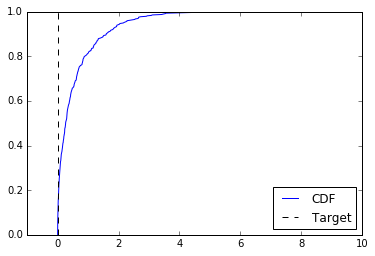

In [16]:
import matplotlib.pyplot as plt
(x1, y1), (x2, y2), _ = theHM.getHorsetail()
plt.plot(x1, y1, 'b', label='CDF')
plt.plot([theHM.ftarget(y) for y in y1], y1, 'k--', label='Target')
plt.xlim([-1, 10])
plt.legend(loc='lower right')
plt.show()

Now if we want to use this within an optimization, its a simple as passing theHM.evalMetric to whichever optimizer we like. For example, using the scipy optimize module's minimize function:

In [18]:
from scipy.optimize import minimize

solution = minimize(theHM.evalMetric, x0=[3,2], method='Nelder-Mead')
print(solution)

  status: 0
    nfev: 107
 success: True
     fun: 0.0
       x: array([-2.46257592,  2.46257594])
 message: 'Optimization terminated successfully.'
     nit: 54


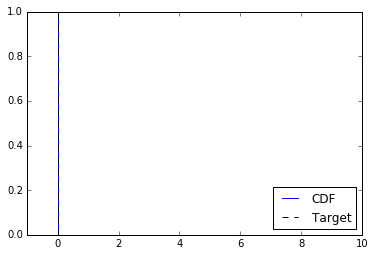

In [19]:
(x1, y1), (x2, y2), _ = theHM.getHorsetail()
plt.plot(x1, y1, 'b', label='CDF')
plt.plot([theHM.ftarget(y) for y in y1], y1, 'k--', label='Target')
plt.xlim([-1, 10])
plt.legend(loc='lower right')
plt.show()

For this simple test problem the minimum is at x=[0, 0] where the CDF is a step function at 0, and so the horsetail matching metric is also 0. 

This concludes our introduction to horsetail matching. For other tutorials, please visit http://www-edc.eng.cam.ac.uk/aerotools/horsetailmatching/